In [3]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import hvplot.pandas
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Display all of the columns
pd.set_option('display.max_columns', None)

In [4]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [5]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [6]:
df_reduce =df.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash'], inplace=False)
df_reduce

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment
0,870038,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142
1,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124
2,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47
3,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124
4,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,901310,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328
11228,901310,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782
11229,901310,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133
11230,901310,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92


In [7]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_SurfaceAreaEachSqFt',
       'Assembly_MainPartShape', 'Assembly_MainPartDimension',
       'Assembly_MainPartFinishDescr', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'EPM_AdjustedStationName',
       'TimeInSeconds_ThisWorkSegment'],
      dtype='object')

In [8]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID         2682
EPM_InstanceNumber                   851
Assembly_MainPieceProductionCode      62
Assembly_MainPartLengthFt           1161
Assembly_WeightEachLbs              2135
Assembly_SurfaceAreaEachSqFt        1944
Assembly_MainPartShape                19
Assembly_MainPartDimension           419
Assembly_MainPartFinishDescr          12
Assembly_TotalQuantityInJob           70
Assembly_NumSmallParts                92
EPM_AdjustedStationName                8
TimeInSeconds_ThisWorkSegment       3323
dtype: int64


In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_INFILL,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PIPE HANDRAIL,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM PLATE,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPa

In [10]:
# Split target column from dataset
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment']
X = df_reduce_encoded.drop(columns='TimeInSeconds_ThisWorkSegment')

In [11]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (11232, 527)
Targe Shape: (11232,)


In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (11232, 527)
Targe Shape: (11232,)


In [14]:
# Display the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (8424, 527)
Training Target Shape: (8424,)
Testing Features Shape: (2808, 527)
Testing Target Shape: (2808,)


In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Linear Regression Model

In [16]:
# Instantiate the linear regression model
model = LinearRegression()

In [17]:
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Display the slope and y-intercept
print(f"Models slope: {model.coef_}")
print(f"Models y-intercept: {model.intercept_}")

Models slope: [-1.38302991e+02 -6.54206737e+01 -3.46724101e+03  1.41428341e+04
 -1.34810226e+03  5.75772960e+02  1.21352761e+03  1.06119880e+16
 -6.40016315e+15 -8.14840979e+15  4.51984662e+15  4.28245003e+15
 -5.80433029e+16 -1.34817383e+15 -2.46039415e+15 -3.08625557e+15
 -8.31494217e+15  2.80619165e+15  2.02000196e+16  3.22939420e+16
 -5.90893633e+15  1.16805933e+16  3.71025623e+15 -2.52313956e+16
 -2.43188835e+16  1.54999926e+16 -1.11826867e+16  2.13036511e+16
  7.21234212e+16  3.78506309e+15 -2.88578958e+16  1.42937261e+16
 -1.88270249e+16  5.99232282e+15 -7.01984611e+15  1.81214243e+15
  3.14904501e+16 -9.45533002e+15  2.43066657e+15  7.82330731e+15
 -3.11106994e+15 -2.80478079e+15 -5.66710676e+15 -4.52187464e+15
 -1.25176929e+16  5.05080859e+15  5.42349726e+15 -4.60378883e+14
  1.81214243e+15 -9.20265601e+14 -7.51572343e+14  1.55233997e+16
 -3.15197195e+15 -1.22470908e+16 -7.24057031e+15 -2.65831434e+14
  4.12716358e+15  5.24053405e+15 -3.05475158e+16  1.81214243e+15
 -2.5773944

In [19]:
# Display the model's best fit line formula
print(f"Models formula: y = {model.intercept_}+{model.coef_[0]}X")

Models formula: y = 2390.4574061911226+-138.30299079289188X


# Run the Predictions

In [20]:
# Predict the target values for the entire dataset
y_pred = model.predict(X_test)

C:\Users\micaz\anaconda4\envs\dev\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Adjusted R^2
n = X_test.shape[0]  # Number of samples
k = X_test.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - r2_score) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score:", adj_r2)

R^2 Score: -2.6120324875477524e+25
Mean Absolute Error: 3.853234766498477e+16
Mean Squared Error: 1.7599585030940788e+33
Root Mean Squared Error: 4.195185935204874e+16
Mean Absolute Percentage Error: inf
Adjusted R^2 Score: -3.2157785932221673e+25


C:\Users\micaz\anaconda4\envs\dev\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\micaz\anaconda4\envs\dev\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


C:\Users\micaz\AppData\Local\Temp\ipykernel_8040\2499883958.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


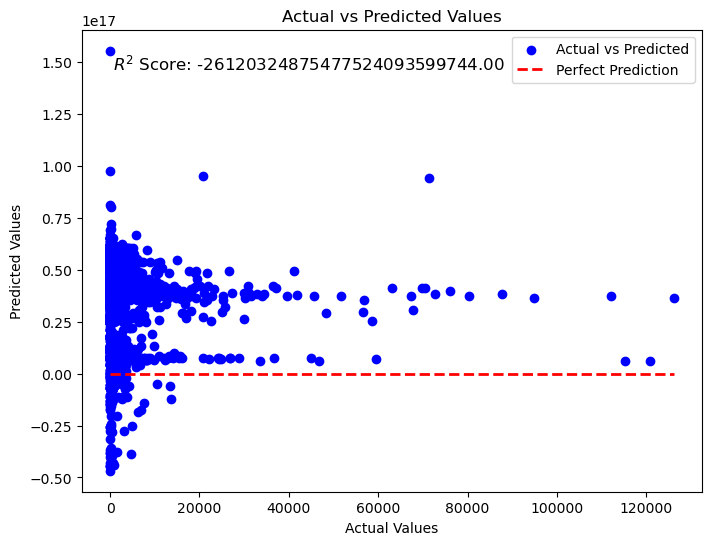

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.text(0.05, 0.95, f'$R^2$ Score: {r2_score:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(False)  # Removing grid lines
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')  # Saving plot to PNG file
plt.show()

# Move away from linear regression
I do not see a linear relationship with individual features.  Move to Random Forest Regression to consider multiple features and the relationship between them.